# 19기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [63]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [64]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [65]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [67]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### 결측치 없음

In [68]:
df['Gender'].nunique()

2

In [69]:
df['w']=0 # 여성
df['m']=0 # 남성

In [70]:
df[df['Gender']=='Female']
df[df['Gender']=='Female'].index
idx = df[df['Gender']=='Female'].index
idx

Int64Index([  3,   4,   5,   6,   7,   8,  10,  12,  13,  14,
            ...
            185, 187, 189, 190, 191, 192, 194, 195, 196, 197],
           dtype='int64', name='CustomerID', length=112)

In [75]:
df.loc[idx,'w']=1
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),w,m
CustomerID,,,,,,
1,Male,19,15,39,0,0
2,Male,21,15,81,0,0
3,Female,20,16,6,1,0
4,Female,23,16,77,1,0
5,Female,31,17,40,1,0
...,...,...,...,...,...,...
196,Female,35,120,79,1,0
197,Female,45,126,28,1,0
198,Male,32,126,74,0,0


In [76]:
idx2 = df[df['Gender']=='Male'].index
df.loc[idx2,'m']=1
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),w,m
CustomerID,,,,,,
1,Male,19,15,39,0,1
2,Male,21,15,81,0,1
3,Female,20,16,6,1,0
4,Female,23,16,77,1,0
5,Female,31,17,40,1,0
...,...,...,...,...,...,...
196,Female,35,120,79,1,0
197,Female,45,126,28,1,0
198,Male,32,126,74,0,1


In [77]:
df.drop(columns=['Gender'], inplace = True)

In [90]:
df['Age'] = df['Age'].apply(lambda x: x//10) 
# 너무 유니크한 값이 많으니까 10의 자리만 남김

In [91]:
df

,Age,Annual Income (k$),Spending Score (1-100),w,m
CustomerID,,,,,
1,1,15,39,0,1
2,2,15,81,0,1
3,2,16,6,1,0
4,2,16,77,1,0
5,3,17,40,1,0
...,...,...,...,...,...
196,3,120,79,1,0
197,4,126,28,1,0
198,3,126,74,0,1


In [96]:
df_data = df.copy()
df_data

,Age,Annual Income (k$),Spending Score (1-100),w,m
CustomerID,,,,,
1,1,15,39,0,1
2,2,15,81,0,1
3,2,16,6,1,0
4,2,16,77,1,0
5,3,17,40,1,0
...,...,...,...,...,...
196,3,120,79,1,0
197,4,126,28,1,0
198,3,126,74,0,1


In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_data)

x = scaler.transform(df_data)


In [134]:
x

array([[-1.73584891, -1.73899919, -0.43480148, -1.12815215,  1.12815215],
       [-1.01855597, -1.73899919,  1.19570407, -1.12815215,  1.12815215],
       [-1.01855597, -1.70082976, -1.71591298,  0.88640526, -0.88640526],
       [-1.01855597, -1.70082976,  1.04041783,  0.88640526, -0.88640526],
       [-0.30126303, -1.66266033, -0.39597992,  0.88640526, -0.88640526],
       [-1.01855597, -1.66266033,  1.00159627,  0.88640526, -0.88640526],
       [-0.30126303, -1.62449091, -1.71591298,  0.88640526, -0.88640526],
       [-1.01855597, -1.62449091,  1.70038436,  0.88640526, -0.88640526],
       [ 1.85061578, -1.58632148, -1.83237767, -1.12815215,  1.12815215],
       [-0.30126303, -1.58632148,  0.84631002,  0.88640526, -0.88640526],
       [ 1.85061578, -1.58632148, -1.4053405 , -1.12815215,  1.12815215],
       [-0.30126303, -1.58632148,  1.89449216,  0.88640526, -0.88640526],
       [ 1.13332284, -1.54815205, -1.36651894,  0.88640526, -0.88640526],
       [-1.01855597, -1.54815205,  1.0

In [135]:
from sklearn.cluster import KMeans

n_cluster = []
sse=[]

for n in range(3,15):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(x)
    n_cluster+=[n]
    sse += [kmeans.inertia_]

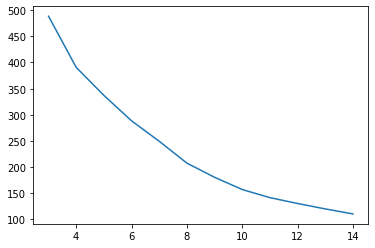

In [136]:
import matplotlib.pyplot as plt
plt.plot(n_cluster, sse)

In [137]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(x)

KMeans(n_clusters=4)

In [138]:
cluster=kmeans.predict(x)
cluster

array([2, 2, 3, 0, 3, 0, 3, 0, 1, 0, 1, 0, 3, 0, 1, 2, 3, 2, 1, 0, 1, 2,
       3, 2, 3, 2, 3, 2, 3, 0, 1, 0, 1, 2, 3, 0, 3, 0, 3, 0, 3, 2, 1, 0,
       3, 0, 3, 0, 0, 3, 3, 2, 0, 1, 3, 1, 3, 1, 0, 1, 1, 2, 3, 3, 1, 2,
       3, 3, 2, 0, 1, 3, 3, 3, 1, 2, 3, 1, 0, 3, 1, 2, 1, 3, 0, 1, 3, 0,
       0, 3, 3, 2, 1, 3, 3, 2, 3, 0, 1, 2, 0, 3, 1, 2, 1, 0, 3, 1, 1, 1,
       1, 0, 3, 2, 0, 0, 3, 3, 3, 3, 2, 3, 3, 2, 0, 0, 1, 2, 1, 2, 1, 2,
       0, 0, 1, 0, 3, 2, 2, 0, 3, 2, 0, 0, 1, 2, 1, 0, 3, 2, 1, 2, 3, 0,
       3, 0, 1, 0, 1, 0, 3, 0, 2, 0, 1, 0, 1, 0, 3, 2, 1, 2, 1, 2, 3, 0,
       1, 2, 1, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 0, 3, 0, 1, 0, 3, 0, 3, 2,
       1, 2])

# PCA로 2차원 만들어서 시각화

In [127]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
principalDf['cluster'] = cluster

In [128]:
principalDf

,principal component1,principal component2,cluster
0,1.391171,-0.899583,1
1,1.274661,-1.525570,1
2,-1.262989,0.778890,0
3,-1.530052,-1.134139,2
4,-1.346526,0.364429,0
...,...,...,...
195,-1.196439,-1.101129,2
196,-0.945845,0.754523,0
197,1.662297,-1.278250,1
198,1.904634,0.186325,3


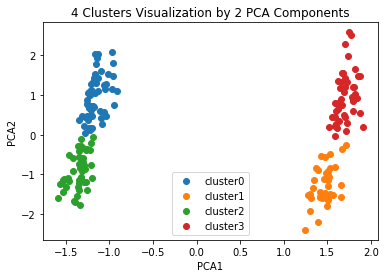

In [129]:
from matplotlib import pyplot as plt

# 클러스터별 인덱스 추출
marker0 = principalDf[principalDf['cluster'] == 0].index
marker1 = principalDf[principalDf['cluster'] == 1].index
marker2 = principalDf[principalDf['cluster'] == 2].index
marker3 = principalDf[principalDf['cluster'] == 3].index
 #scatter plot
plt.scatter(x = principalDf.loc[marker0, 'principal component1'], y = principalDf.loc[marker0, 'principal component2'])
plt.scatter(x = principalDf.loc[marker1, 'principal component1'], y = principalDf.loc[marker1, 'principal component2'])
plt.scatter(x = principalDf.loc[marker2, 'principal component1'], y = principalDf.loc[marker2, 'principal component2'])
plt.scatter(x = principalDf.loc[marker3, 'principal component1'], y = principalDf.loc[marker3, 'principal component2'])
 
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('4 Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1', 'cluster2', 'cluster3'])
plt.show()

In [146]:
df_data['cluster'] = cluster
df_data.groupby('cluster').mean()

,Age,Annual Income (k$),Spending Score (1-100),w,m
cluster,,,,,
0,2.415094,60.660377,69.358491,1.0,0.0
1,4.565217,61.760870,30.152174,0.0,1.0
2,2.238095,62.738095,68.619048,0.0,1.0
3,4.271186,57.983051,35.508475,1.0,0.0


## 위 시각화를 보면 0번과 2번, 1번과 3번이 몰려있는데 이는 클러스터로 그룹화한 것의 평균을 보았을 때도 나이대와 spending score로 비슷하게 분류됨
## 0과 2, 1과 3 사이의 차이는 성별로 보임